In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact

In [2]:
# Loading the dataset
data = pd.read_csv("agriculture_data.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# renaming the dataset for better understanding
data.rename(columns = {'N':'Nitrogen', 
                       'P':'Phosphorus', 
                       'K':'Potassium'}, inplace = True)
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


---

### Data Cleaning
> Data Cleaning is the process of preparing raw data for analysis by removing bad data, organizing the raw data and filling in the null values. 

In [4]:
# checking for null values
data.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

No null value is present in the dataset

In [5]:
# dimensionality of the dataset
data.shape

(2200, 8)

There are about 2200 records of crops and 8 features of crop production

In [6]:
# Taking a look into the labels
list_of_crop = data['label'].unique()
print(list_of_crop)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [7]:
data['label'].value_counts()

kidneybeans    100
maize          100
chickpea       100
apple          100
pomegranate    100
watermelon     100
lentil         100
banana         100
grapes         100
jute           100
coffee         100
cotton         100
blackgram      100
mungbean       100
pigeonpeas     100
rice           100
muskmelon      100
mango          100
orange         100
papaya         100
coconut        100
mothbeans      100
Name: label, dtype: int64

---

### EDA
> In this will perform some statistic for all the condition for crop dataset 

In [8]:
print('Average Ratio of Nitrogen in the Soil:    {0:.2f}'.format(data['Nitrogen'].mean()))
print('Average Ratio of Phosphoros in the Soil: {0:.2f}'.format(data['Phosphorus'].mean()))
print('Average Ratio of Potassiam in the Soil:   {0:.2f}'.format(data['Potassium'].mean()))
print('Average Temperature in Celcius:           {0:.2f}'.format(data['temperature'].mean()))
print('Average Relative Humidity in % :          {0:.2f}'.format(data['humidity'].mean()))
print('Average ph value for the Soil:            {0:.2f}'.format(data['ph'].mean()))
print('Average RainFall in 1mm:                  {0:.2f}'.format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil:    50.55
Average Ratio of Phosphoros in the Soil: 53.36
Average Ratio of Potassiam in the Soil:   48.15
Average Temperature in Celcius:           25.62
Average Relative Humidity in % :          71.48
Average ph value for the Soil:            6.47
Average RainFall in 1mm:                  103.46


In [9]:
data.describe()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
@interact
def summary (crops=list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print("-----------------------------------------------")
    print('Statistics for Nitrogen')
    print('Minimum Nitrogen Required :',x['Nitrogen'].min())
    print('Average Nitrogen Required :',x['Nitrogen'].mean())
    print('Maximum Nitrogen Required :',x['Nitrogen'].max())
    print("-----------------------------------------------")
    print('Statistics for Phosphorous')
    print('Minimum Phosphorous Required :',x['Phosphorus'].min())
    print('Average Phosphorous Required :',x['Phosphorus'].mean())
    print('Maximum Phosphorous Required :',x['Phosphorus'].max())
    print("-----------------------------------------------")
    print('Statistics for Potassium')
    print('Minimum Potassium Required :',x['Potassium'].min())
    print('Average Potassium Required :',x['Potassium'].mean())
    print('Maximum Potassium Required :',x['Potassium'].max())
    print("-----------------------------------------------")
    print('Statistics for Temperature')
    print('Minimum Temperature Required : {0:.2f}'.format(x['temperature'].min()))
    print('Average Temperature Required : {0:.2f}'.format(x['temperature'].mean()))
    print('Maximum Temperature Required : {0:.2f}'.format(x['temperature'].max()))
    print("-----------------------------------------------")
    print('Statistics for Humadity')
    print('Minimum Humidity Required : {0:.2f}'.format(x['humidity'].min()))
    print('Average Humidity Required : {0:.2f}'.format(x['humidity'].mean()))
    print('Maximum Humidity Required : {0:.2f}'.format(x['humidity'].max()))
    print("-----------------------------------------------")
    print('Statistics for PH')
    print('Minimum PH Required : {0:.2f}'.format(x['ph'].min()))
    print('Average PH Required : {0:.2f}'.format(x['ph'].mean()))
    print('Maximum PH Required : {0:.2f}'.format(x['ph'].max()))
    print("-----------------------------------------------")
    print('Statistics for RainFall')
    print('Minimum RainFall Required : {0:.2f}'.format(x['rainfall'].min()))
    print('Average RainFall Required : {0:.2f}'.format(x['rainfall'].mean()))
    print('Maximum RainFall Required : {0:.2f}'.format(x['rainfall'].max()))
    print("-----------------------------------------------")

interactive(children=(Dropdown(description='crops', options=('kidneybeans', 'maize', 'chickpea', 'apple', 'pom…

In [11]:
@interact
def compare(conditions=['Nitrogen','Phosphorus','Potassium','temperature','humidity','ph','rainfall']):
    print('Average value for',conditions,'is {0:.2f}'.format(data[conditions].mean()))
    print("-----------------------------------------------")
    print('Rice : {0:.2f}'.format(data[(data['label']=='rice')][conditions].mean()))
    print('Black Grams : {0:.2f}'.format(data[(data['label']=='blackgram')][conditions].mean()))
    print('Kidney Beans : {0:.2f}'.format(data[(data['label']=='kidneybeans')][conditions].mean()))
    print('Pigeon Peas : {0:.2f}'.format(data[(data['label']=='pigeonpeas')][conditions].mean()))
    print('Maize : {0:.2f}'.format(data[(data['label']=='maize')][conditions].mean()))
    print('Orange : {0:.2f}'.format(data[(data['label']=='orange')][conditions].mean()))
    print('Coconut : {0:.2f}'.format(data[(data['label']=='coconut')][conditions].mean()))
    print('Muskmelon : {0:.2f}'.format(data[(data['label']=='muskmelon')][conditions].mean()))
    print('Water Melon : {0:.2f}'.format(data[(data['label']=='watermelon')][conditions].mean()))
    print('Pome Granate : {0:.2f}'.format(data[(data['label']=='pomegranate')][conditions].mean()))
    print('Banana : {0:.2f}'.format(data[(data['label']=='banana')][conditions].mean()))
    print('Coffee : {0:.2f}'.format(data[(data['label']=='coffee')][conditions].mean()))
    print('Mango : {0:.2f}'.format(data[(data['label']=='mango')][conditions].mean()))
    print('Chick Peas : {0:.2f}'.format(data[(data['label']=='chickpea')][conditions].mean()))
    print('Grapes : {0:.2f}'.format(data[(data['label']=='grapes')][conditions].mean()))
    print('Jute : {0:.2f}'.format(data[(data['label']=='jute')][conditions].mean()))
    print('Mung Beans : {0:.2f}'.format(data[(data['label']=='mungbean')][conditions].mean()))
    print('Papaya : {0:.2f}'.format(data[(data['label']=='papaya')][conditions].mean()))
    print('Lentil : {0:.2f}'.format(data[(data['label']=='lentil')][conditions].mean()))
    print('Apple : {0:.2f}'.format(data[(data['label']=='apple')][conditions].mean()))
    print('Moth Beans : {0:.2f}'.format(data[(data['label']=='mothbeans')][conditions].mean()))
    print('Cotton : {0:.2f}'.format(data[(data['label']=='cotton')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'temp…

In [12]:
@interact
def compare(conditions=['Nitrogen','Phosphorus','Potassium','temperature','humidity','ph','rainfall']):
    print("-----------------------------------------------")
    print("Crops which require more than Average ", conditions ,'\n' )
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print('\n')
    print("-----------------------------------------------")
    print("Crops which require less than Average ", conditions ,'\n' )
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'temp…

In [13]:
# let's find out some interesting patterns

print('Some interesting Facts')
print("-----------------------------------------------")
print('Crops which require very High Ratio of Nitrogen content in Soil',data[data['Nitrogen']>120]['label'].unique())
print("-----------------------------------------------")
print('Crops which require very High Ratio of Phosphorous content in Soil',data[data['Phosphorus']>120]['label'].unique())
print('Crops which require very Low Ratio of Phosphorous content in Soil',data[data['Phosphorus']<10]['label'].unique())
print("-----------------------------------------------")
print('Crops which require very High Ratio of Potassium content in Soil',data[data['Potassium']>200]['label'].unique())
print('Crops which require very Low Ratio of Potassium content in Soil',data[data['Potassium']<10]['label'].unique())
print("-----------------------------------------------")
print('Crops which require very High Rain Fall',data[data['rainfall']>200]['label'].unique())
print('Crops which require very Low Rain Fall',data[data['rainfall']<30]['label'].unique())
print("-----------------------------------------------")
print('Crops which require very High Temperature',data[data['temperature']>40]['label'].unique())
print('Crops which require very Low Temperature',data[data['temperature']<10]['label'].unique())
print("-----------------------------------------------")
print('Crops which require very High Humidity',data[data['humidity']>90]['label'].unique())
print('Crops which require very Low Humidity',data[data['humidity']<20]['label'].unique())
print("-----------------------------------------------")
print('Crops which require very High PH',data[data['ph']>9]['label'].unique())
print('Crops which require very Low PH',data[data['ph']<4]['label'].unique())

Some interesting Facts
-----------------------------------------------
Crops which require very High Ratio of Nitrogen content in Soil ['cotton']
-----------------------------------------------
Crops which require very High Ratio of Phosphorous content in Soil ['grapes' 'apple']
Crops which require very Low Ratio of Phosphorous content in Soil ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
-----------------------------------------------
Crops which require very High Ratio of Potassium content in Soil ['grapes' 'apple']
Crops which require very Low Ratio of Potassium content in Soil ['orange']
-----------------------------------------------
Crops which require very High Rain Fall ['rice' 'papaya' 'coconut']
Crops which require very Low Rain Fall ['muskmelon']
-----------------------------------------------
Crops which require very High Temperature ['grapes' 'papaya']
Crops which require very Low Temperature ['grapes']
-----------------------------------------------
Crops wh

In [13]:
print('Summer Crops')
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("-----------------------------------------------")
print('Winter Crops')
print(data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print("-----------------------------------------------")
print('Rainy Crops')
print(data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [15]:
from sklearn.cluster import KMeans

# removing label column
x = data.drop(['label'],axis = 1)

# Selecting all values of Data
x = x.values

# Checking the Shape
print (x.shape)

(2200, 7)


In [16]:
# lets determine the optimum number of clusters within a DataSet

sum_of_squared_distance = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sum_of_squared_distance.append(km.inertia_)
print(sum_of_squared_distance)

[18820170.463645905, 12070916.353533493, 7423970.865410885, 5337369.950298391, 4417511.116768213, 3748646.2079994995, 3103936.6816232027, 2727858.0937568415, 2374142.9467556863, 2131120.581636316]


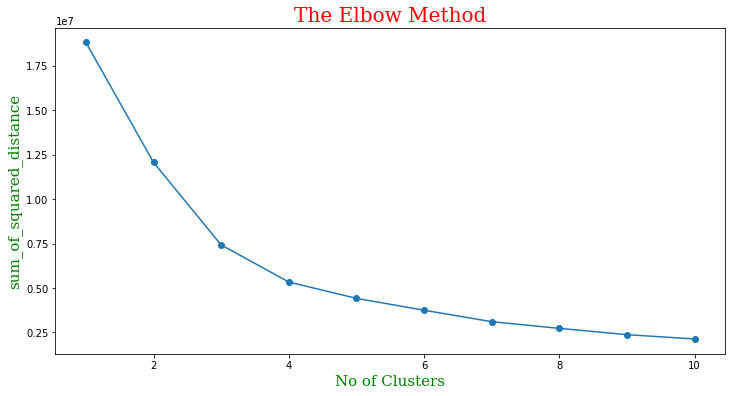

In [19]:
# ploting the information to find the optimal number of cluster  
plt.figure(figsize=(12,6))
font_1 = {'family':'serif','color':'red','size':20}
font_2 = {'family':'serif','color':'green','size':15}
plt.plot(K, sum_of_squared_distance, 'o-')
plt.xlabel('No of Clusters',fontdict=font_2)
plt.ylabel('sum_of_squared_distance',fontdict=font_2)
plt.title('The Elbow Method',fontdict=font_1)

plt.show()

In [20]:
#lets implement the KMeans algorithms to perform clustering anlysis

km = KMeans(n_clusters=4)
y_means = km.fit_predict(x)
print(y_means)

[0 0 0 ... 0 1 0]


In [22]:
# lets find out the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis = 1)
z = z.rename(columns={0:'clusters'})

z.sample(10)

,clusters,label
268,2,chickpea
426,0,pigeonpeas
1364,1,watermelon
1847,0,coconut
393,2,kidneybeans
1846,0,coconut
57,0,rice
1917,1,cotton
876,2,lentil
250,2,chickpea


In [24]:
# lets split the dataset for predictive modeling
y = data['label']
x = data.drop(['label'],axis = 1)

print('Shape of x :',x.shape)
print('Shape of y :',y.shape)

Shape of x : (2200, 7)
Shape of y : (2200,)


In [27]:
# lets create training and testing sets for validation of results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

print('Shape of X_train :',x_train.shape)
print('Shape of X_test :',x_test.shape)
print('Shape of Y_train :',y_train.shape)
print('Shape of Y_test :',y_test.shape)

Shape of X_train : (1760, 7)
Shape of X_test : (440, 7)
Shape of Y_train : (1760,)
Shape of Y_test : (440,)


In [28]:
# lets create a predictive model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [29]:
# lets print out the classification report also
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9681818181818181

In [35]:
prediction = model.predict(np.array([[90,40,40,30,60,7,200]]))
print('The Suggested Crop for given Climate Condition :',prediction)

The Suggested Crop for given Climate Condition : ['coffee']


In [36]:
def predict():
    list1 = []
    Nitrogen = input('Ratio of Nitrogen in the Soil : ')
    list1.append(Nitrogen)
    Phosphorous = input('Ratio of Phosphorous in the Soil : ')
    list1.append(Phosphorous)
    Potassiam = input('Ratio of Potassiam in the Soil :')
    list1.append(Potassiam)
    Temperature = input('Temperature in Celcius : ')
    list1.append(Temperature)
    Humidity = input('Relative Humidity in the Soil % : ')
    list1.append(Humidity)
    ph = input('ph value for the Soil : ')
    list1.append(ph)
    RainFall = input('RainFall in 1mm : ')
    list1.append(RainFall)
    prediction = model.predict(np.array([list1]))
    print('The Suggested Crop for given Climate Condition :',prediction)

In [37]:
flag = True
while flag:
    predict()
    choice = input('If you want to continue Enter Yes if Not Enter any Key : ')
    if choice == 'Yes':
        #Potassiam = input('Ratio of Potassiam in the Soil :')
        flag = True
    else:
        flag = False
        
        
        print('Good luck! We Hope ', prediction ,'make much Growth in Climate Condition you enter '   )
    

Ratio of Nitrogen in the Soil : 27
Ratio of Phosphorous in the Soil : 120
Ratio of Potassiam in the Soil :200
Temperature in Celcius : 21.45
Relative Humidity in the Soil % : 90
ph value for the Soil : 6
RainFall in 1mm : 116
The Suggested Crop for given Climate Condition : ['apple']
If you want to continue Enter Yes if Not Enter any Key : ijfg
Good luck! We Hope  ['coffee'] make much Growth in Climate Condition you enter 
